## Carga del dataset Diamonds
En esta segunda parte trabajaremos con un dataset de R que describe las características físicas de un conjunto de diamantes. Puede cargarse mediante get_rdataset(), y está en el paquete "ggplot2" con nombre "diamonds"

In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
diamonds = sm.datasets.get_rdataset("diamonds", "ggplot2")
data = diamonds.data
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Estudio de los tipos de las columnas

In [79]:
print (type(data))
print ("carat", data["carat"].dtype)
print ("cut", data["cut"].dtype)
print ("color", data["color"].dtype)
print ("clarity", data["clarity"].dtype)
print ("depth", data["depth"].dtype)
print ("table", data["table"].dtype)
print ("price", data["price"].dtype)

<class 'pandas.core.frame.DataFrame'>
carat float64
cut object
color object
clarity object
depth float64
table float64
price int64


## Cálculo de los valores máximo, mínimo y medio de la variable carat

In [78]:
print("Media Carat", np.mean(data.carat))
print("Máximo Carat",np.max(data.carat) )
print("Mínimo Carat", np.min(data.carat))

Media Carat 0.7979397478679852
Máximo Carat 5.01
Mínimo Carat 0.2


## Dibujo del histograma Carat vs Distribución Gamma

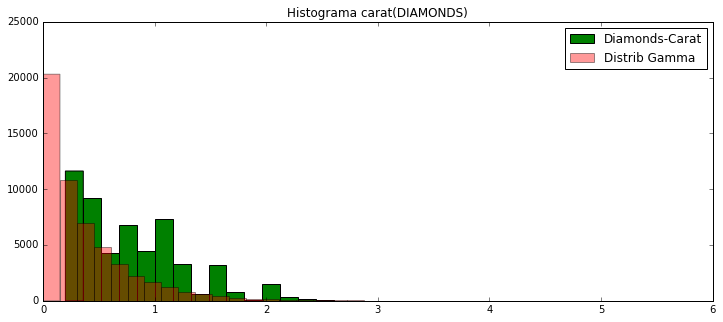

In [81]:
%matplotlib inline

fig = plt.figure(1, figsize=(12, 5))
fig.add_subplot(111)

dist_gamma = np.random.gamma(np.mean(data.carat), np.std(data.carat), data.carat.size)

plt.hist(data.carat, bins=30, histtype='bar',  color='g', label='Diamonds-Carat')
plt.hist(dist_gamma, bins=30, histtype='bar',  color='r', alpha=0.4, label='Distrib Gamma')
plt.title("Histograma carat(DIAMONDS)")
plt.legend()
plt.show()


## Nube de puntos de Carat vs Precio
Ejes en escala logarítmica

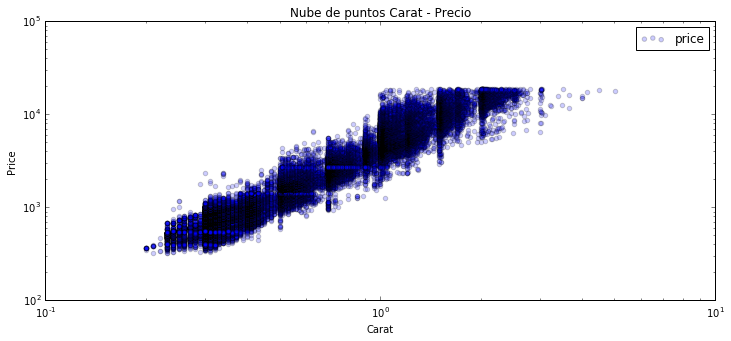

In [82]:
%matplotlib inline

fig = plt.figure(1, figsize=(12, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("Carat")
ax.set_ylabel("Price")
ax.set_yscale('log')
ax.set_xscale('log')
 
plt.scatter(data.carat, data.price, alpha=0.2)
plt.title("Nube de puntos Carat - Precio")

plt.legend()
plt.show()

## Nube de puntos de Carat vs Precio (Color = E y Claridad = SI1)
Ejes en escala logarítmica

In [85]:
data_filtered = data[data.color.eq("E")][data.clarity.eq("SI1")]

C:\Users\Ainhoa\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


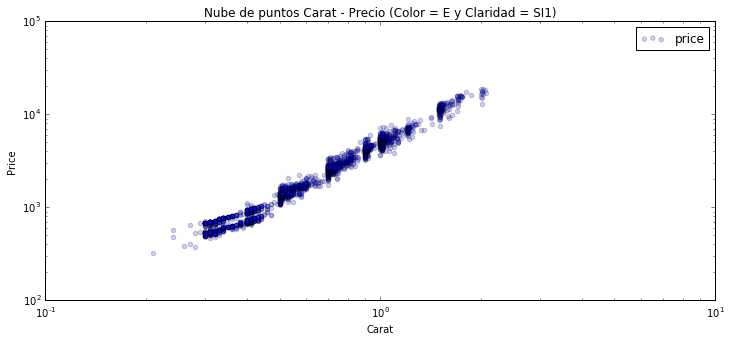

In [86]:
fig = plt.figure(1, figsize=(12, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("Carat")
ax.set_ylabel("Price")
ax.set_yscale('log')
ax.set_xscale('log')

 
plt.scatter(data_filtered.carat, data_filtered.price, alpha=0.2)
plt.title("Nube de puntos Carat - Precio (Color = E y Claridad = SI1)")

plt.legend()
plt.show()

## Relación entre volumen y precio
Ejes en escala logarítmica

In [87]:
data['volumen'] = data.x*data.y*data.z

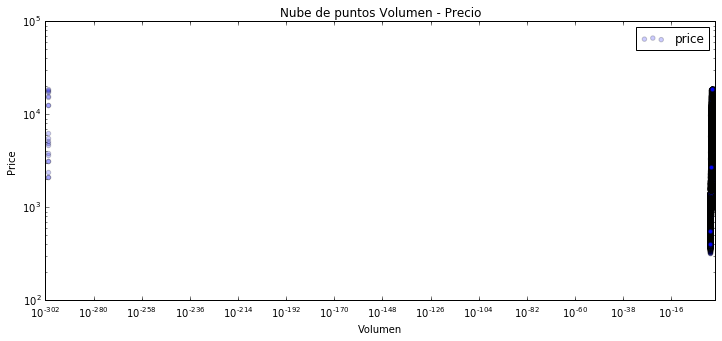

In [88]:
fig = plt.figure(1, figsize=(12, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("Volumen")
ax.set_ylabel("Price")
ax.set_yscale('log')
ax.set_xscale('log')

 
plt.scatter(data.volumen, data.price, alpha=0.2)
plt.title("Nube de puntos Volumen - Precio")

plt.legend()
plt.show()

En el gráfico puede observarse que existen, tras las transformación logarítmica, outliers que toman valores muy cercanos a cero.

In [89]:
data_filtered_v = data[data['volumen'] > 0]
print(data.shape)
print(data_filtered_v.shape)

(53940, 13)
(53920, 13)


Se eliminan 20 observaciones, mediante la condición de que el valor de carat sea estrictamente mayor que cero.

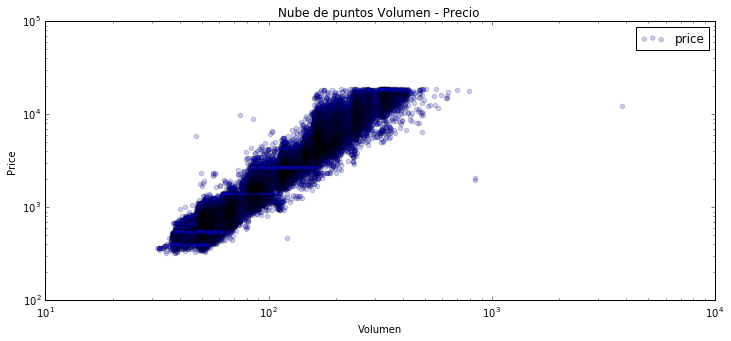

In [91]:
fig = plt.figure(1, figsize=(12, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("Volumen")
ax.set_ylabel("Price")
ax.set_yscale('log')
ax.set_xscale('log')

 
plt.scatter(data_filtered_v.volumen, data_filtered_v.price, alpha=0.2)
plt.title("Nube de puntos Volumen - Precio ")

plt.legend()
plt.show()


Del gráfico de dispersión parece apreciarse una depencia funcional de tipo lineal entre el volumen y el precio, una vez eliminados los outliers. 

## Comprobación de existencia de relación lineal entre precio y volumen, mediante la aplicación del modelo de regresión lineal
Utlización de las primeras 1000 observaciones

In [109]:
from scipy import stats
from pylab import plot,show
result = sm.OLS(data.price[:1000], data.volumen[:1000]).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 3.720e+04
Date:                Tue, 12 Jul 2016   Prob (F-statistic):               0.00
Time:                        19:25:08   Log-Likelihood:                -7466.0
No. Observations:                1000   AIC:                         1.493e+04
Df Residuals:                     999   BIC:                         1.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
volumen       22.1492      0.115    192.871      0.000        21.924    22.375
==============================================================================
Omnibus:                       57.682   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.875
Skew:                          -0.593   Prob(JB):                     3.01e-15
Kurtosis:                       3.447   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De la aplicación del modelo OLS se obtiene un r cuadrado muy alto, 0.974
El p-value nos indica que el coeficiente es significativo con un nivel de significación <0.01.

No obstante, de los resultados podemos observar que algunos de los supuestos para la correcta aplicación de OLS, no se cumplen. Por ejemplo,  el test de Durbin-Watson está indicando existencia de autocorrelación (ya que el  valor no se encuentra en torno a 2), y la Prob(Omnibus) al tomar un valor muy pequeño, apunta a la no normalidad de los residuos. 

## Utlización Seaborn: nube de puntos precio vs carat

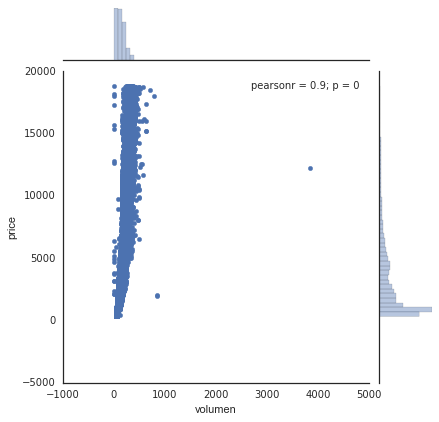

In [110]:
import seaborn as sns;
sns.set(style="white", color_codes=True)
g = sns.jointplot(x="volumen", y="price", data=data)

## Identificación con un comando los diferentes tipos de corte (cut)

In [14]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

## Comprobación de la existencia de diferencias significativas en la media del precio para los cuts "Ideal" y "Premium" y el resto de cuts

Antes de realizar el análisis, se va a proceder a hacer análisis descriptivo. Se creará una nueva variable cut_label que agrupe el data frame en tres nuevas categorías de carat: Idela, Premium y Resto. 
De los box plot se puede apreciar que la distribución de la variable precio, para los distintos tipos de cut no es normal.

In [125]:
groupby_cut = data.groupby('cut')
for cut, value in groupby_cut['price']: print((cut, value.mean()))   

('Fair', 4358.757763975155)
('Good', 3928.864451691806)
('Ideal', 3457.541970210199)
('Premium', 4584.2577042999055)
('Very Good', 3981.7598907465654)


In [119]:
def cut_two (row):
    if row['cut'] == "Premium" :
      return 'Premium'
    if row['cut'] == "Ideal":
      return 'Ideal'
    return 'Resto'

In [123]:
data['cut_label'] = data.apply (lambda row: label_race (row),axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volumen,logvolumen,logprice,cut_label
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,3.642889,5.786897,Ideal
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,3.541129,5.786897,Premium
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,3.639607,5.789960,Resto
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,3.844270,5.811141,Premium
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,3.949651,5.814131,Resto


C:\Users\Ainhoa\Anaconda3\lib\site-packages\pandas\tools\plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


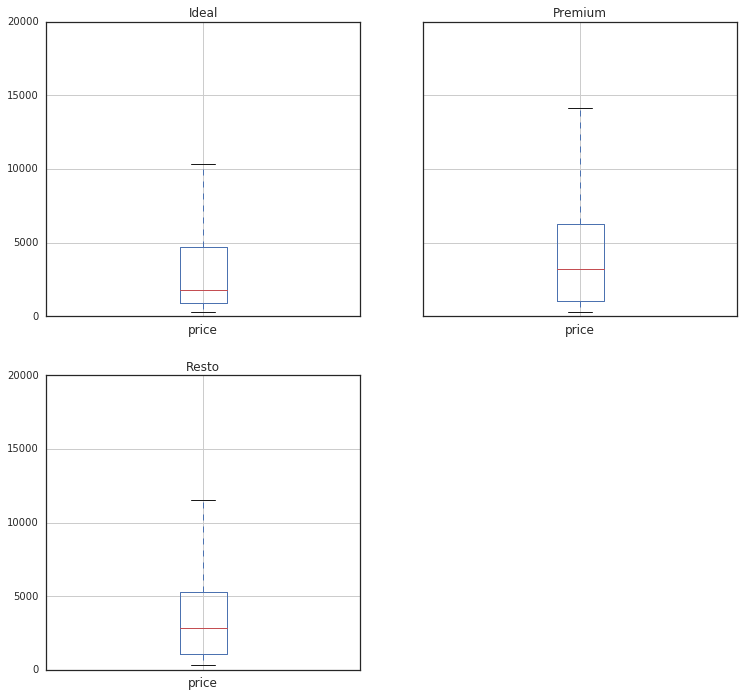

In [124]:
groupby_cut_label = data.groupby('cut_label')
groupby_cut_label.boxplot(column=['price'], figsize=(12, 12))
plt.show()

A continuación, se va proceder a realizar el muestreo para los tres distintos grupos: ideal, premium y el resto (Very Good, Good y Fair)

In [69]:
import random
from scipy import stats

ideal = data[data.cut == 'Ideal']
rows_ideal  = random.sample(list(ideal.index),1000)
sample_ideal = ideal.ix[rows_ideal]

premium = data[data.cut == 'Premium']
rows_premium  = random.sample(list(premium.index),1000)
sample_premium = premium.ix[rows_premium]

resto=data[(data.cut!='Ideal')&(data.cut!='Premium')]
rows_resto  = random.sample(list(resto.index),1000)
sample_resto = resto.ix[rows_resto]

Se comprueba a continuación, si existen diferencias significativas en las medias de los tres grupos: Ideal, Premium y Resto. Para ello se utilizará un contraste no paramétrico, ya que no se asume normalidad. Se utilizará el test de Wilcoxon, ya que se disponde de muestras de gran tamaño. Se plantea como hipótesis nula (H0) que las muestras provienen de la misma población. 

In [99]:
from scipy import stats
stats.wilcoxon(x=sample_ideal.price, y=sample_resto.price, zero_method='wilcox', correction=False)

WilcoxonResult(statistic=201319.5, pvalue=8.5060458994439777e-08)

Aplicando el Wilcoxon Test a las muestras provenientes de Ideal y de Resto, rechazamos la hipótesis nula, ya que el p-value es menor que 0.05. No podemos afirmar que las muestras provengan de la misma población.

In [102]:
from scipy import stats
stats.wilcoxon(x=sample_premium.price, y=sample_resto.price, zero_method='wilcox', correction=False)

WilcoxonResult(statistic=238607.5, pvalue=0.20251592769379878)

Aplicando el Wilcoxon Test a las muestras provenientes de Premium y de Resto, no podemos rechazar la hipótesis nula.

## Obtención de la mediana del precio para cada valor de la claridad (clarity) y ordenación de  los resultados de manera descendente.

In [105]:
print(data[['clarity','price']].groupby(['clarity']).median().sort_values(by='price',ascending=False))

         price
clarity       
SI2       4072
I1        3344
SI1       2822
VS2       2054
VS1       2005
VVS2      1311
VVS1      1093
IF        1080
